 <font size=6 >1 Reading a file</font>

In [1]:
import csv
import numpy as np
import pandas as pd
df = pd.read_csv("data.csv")

In [2]:
df

,user,user_location,text,favorite_count,retweet_count
0,weird alien,NaN,i miss @sesameseee. cant wait for february 20t...,0,0
1,Nancy D.,"Boise, ID","Sheesh, bad enough that I’m lumped in with 16 ...",0,0
2,CommercialHepC,nearest fork store,RT @Fgbrisco: Me after I get my COVID vaccine....,0,56
3,Dr. President-Elect Kemp English,"A Galaxy Far, Far Away. . . .",RT @michaeljknowles: Well that's not good. htt...,0,43
4,A Voice For Choice Advocacy,NaN,"""In addition to the deaths, people have report...",0,0
...,...,...,...,...,...
1152,Just This Guy,"Austin, TX",RT @JoeBiden: To get as many people vaccinated...,0,5856
1153,Laura Twing,NaN,RT @AmherstCollege: Congratulations to Dr. @Da...,0,27
1154,Lorene Soos,NaN,RT @thehill: Incoming Biden chief of staff on ...,0,86
1155,Baby-Legs O’Shanahan,Ray’s Boom Boom Room,RT @DrEricDing: BREAKING—UK🇬🇧 Cabinet minister...,0,1785


In [3]:
df.describe()

,favorite_count,retweet_count
count,1157.000000,1157.000000
mean,0.102852,956.411409
std,0.887612,2400.540518
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,43.000000
75%,0.000000,1048.000000
max,24.000000,23454.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user            1157 non-null   object
 1   user_location   802 non-null    object
 2   text            1157 non-null   object
 3   favorite_count  1157 non-null   int64 
 4   retweet_count   1157 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 45.3+ KB


 <font size=3 >After importing the data, check the basic information of raw data. Obviously, some data in the user_ location field is null.So we should drop the null data.For text field,it needs to retrieve 'RT' for filtering in data cleaning.</font>

 <font size=6 >2 Data cleaning</font>

 <font size=5 >(1)Text data cleaning</font>

In [5]:
selected_columns1 = ['user','text','favorite_count','retweet_count']  
df_text= df[selected_columns1].copy()

 <font size=3> Copy the data frame to protect the raw data. In order to reduce interference, select rows related to subsequent analysis</font>

In [6]:
df_text

,user,text,favorite_count,retweet_count
0,weird alien,i miss @sesameseee. cant wait for february 20t...,0,0
1,Nancy D.,"Sheesh, bad enough that I’m lumped in with 16 ...",0,0
2,CommercialHepC,RT @Fgbrisco: Me after I get my COVID vaccine....,0,56
3,Dr. President-Elect Kemp English,RT @michaeljknowles: Well that's not good. htt...,0,43
4,A Voice For Choice Advocacy,"""In addition to the deaths, people have report...",0,0
...,...,...,...,...
1152,Just This Guy,RT @JoeBiden: To get as many people vaccinated...,0,5856
1153,Laura Twing,RT @AmherstCollege: Congratulations to Dr. @Da...,0,27
1154,Lorene Soos,RT @thehill: Incoming Biden chief of staff on ...,0,86
1155,Baby-Legs O’Shanahan,RT @DrEricDing: BREAKING—UK🇬🇧 Cabinet minister...,0,1785


<font size=3> Since we want to show users’ attitudes towards the COVID-19 vaccine through their text, retweets are a edundant part of the data. If a tweet is retweet, retweet count is determined by the original tweet， which greatly interferes with our judgment of the user's influence. So we restrict and filter text with "RT" to get original tweets
</font>

In [32]:
df_original=df_text[~df_text['text'].str.contains('RT')]
df_original

,user,text,favorite_count,retweet_count
0,weird alien,i miss @sesameseee. cant wait for february 20t...,0,0
1,Nancy D.,"Sheesh, bad enough that I’m lumped in with 16 ...",0,0
4,A Voice For Choice Advocacy,"""In addition to the deaths, people have report...",0,0
13,Sancho Robbert,If you’re in Long Beach. Do not drive on redon...,0,0
17,Healthcare-Global😷,Pakistan approves AstraZeneca COVID-19 vaccine...,0,0
...,...,...,...,...
1131,❤️🖤אַנטיִפאָ,if you've ever gotten a mouthful of water for ...,0,0
1133,Chairman Pooh,Norway urgently changes Covid vaccine guidance...,4,2
1137,screwtheeast,@calgaryherald @healthing_ca Why don’t you wri...,0,0
1145,carol🍒,"@mariahseulgi then nap while I watch it ma, do...",0,0


<font size=3>We obtained 298 original tweets through filtering. Although the count of favorites and retweets of these users is very small, it ensure the authenticity of the data. There is a question that needs to be improved, that is, how do we get the original tweets that have a huge impact. The only way I can think of is to continue to expand the data set. Maybe by adding some restrictions, I can get more influential tweets data.</font>

In [8]:
df_retweet=df_text[df_text['text'].str.contains('RT')]
df_retweet

,user,text,favorite_count,retweet_count
2,CommercialHepC,RT @Fgbrisco: Me after I get my COVID vaccine....,0,56
3,Dr. President-Elect Kemp English,RT @michaeljknowles: Well that's not good. htt...,0,43
5,Mao,RT @OzraeliAvi: I bet their death certificates...,0,30
6,Leroy,RT @5Agenda21: Take no notice of this scaremon...,0,277
7,Brenda Abramson 🇺🇸,RT @JoeBiden: To get as many people vaccinated...,0,4454
...,...,...,...,...
1152,Just This Guy,RT @JoeBiden: To get as many people vaccinated...,0,5856
1153,Laura Twing,RT @AmherstCollege: Congratulations to Dr. @Da...,0,27
1154,Lorene Soos,RT @thehill: Incoming Biden chief of staff on ...,0,86
1155,Baby-Legs O’Shanahan,RT @DrEricDing: BREAKING—UK🇬🇧 Cabinet minister...,0,1785


<font size=3>This data frame show all retweets so that we can compare them later.</font>

 <font size=5 >(2)Location data cleaning</font>

In [9]:
selected_columns2 = ['user_location','favorite_count','retweet_count']
df_location= df[selected_columns2].copy()

In [10]:
df_location

,user_location,favorite_count,retweet_count
0,NaN,0,0
1,"Boise, ID",0,0
2,nearest fork store,0,56
3,"A Galaxy Far, Far Away. . . .",0,43
4,NaN,0,0
...,...,...,...
1152,"Austin, TX",0,5856
1153,NaN,0,27
1154,NaN,0,86
1155,Ray’s Boom Boom Room,0,1785


In [11]:
df_location['user_location'].unique()

array([nan, 'Boise, ID', 'nearest fork store',
       'A Galaxy Far, Far Away. . . .', 'Anywhere ', 'Maryland, USA',
       'Las Vegas, NV', 'Charlotte, NC', 'USA', 'New Delhi, India',
       ', Melbourne Australia', 'Carroll Park', 'United States',
       'Brisbane, Queensland', 'Panama', 'NEPA',
       'Marunouchi,Chiyoda Tokyo Japan', 'Lincoln, NE',
       'North Myrtle Beach, SC', 'Texas, USA', 'USA 🌴🌞', 'Santa Ana, CA',
       'Ghaziabad, India', 'Ithaca,NY', 'JFK - LAS - LAX - TPE',
       'East Coast.', 'U.S.A.  🇺🇸🇺🇸🇺🇸', 'Los Angeles, CA', 'Lucknow',
       'Sydney, New South Wales', 'Parker, CO', 'Port Charlotte, FL',
       'Little Rock, AR', 'here', 'Miami Beach, FL', 'Cincinnati,ohio',
       'Washington Oasis in the Desert', 'Calgary, Alberta',
       'Arizona, USA', 'Northampton', 'Portland, OR', 'Mumbai, India',
       'West Bengal, India', 'Worldwide', 'Jalisco ',
       'New Delhi/ Mangalore, India ', 'In Your Head!',
       'http://gabbiash.com/pghpa.html', 'No Planet 

<font size=3>The above array is all the unique location information we obtained.The data cleaning in the location part requires to process the N/A data, but also remove some unusable data such as some emoticons or unrealistic locations.</font>

In [12]:
def extract_locations(i):
    i=str(i)
    
    possible_locations = [
        'United Kingdom','UK','England','Scotland','Wales','London','Birmingham','Glasgow','Liverpool' ,'Bristol',
        'Sheffield','Manchester','Leeds','Edinburgh','Leicester','USA', 'U.S.A.','United States','AL','AZ',
        'CA','CO','CT','DE','DC','FL','GA','IL','MS','MT',
        'IN','IA','KS','KY','LA','ME','MD','MA','MI','MN',
        'NC','ND','OH','OK','OR','PA','SC','SD','TX','UT',
        'NV','NY','VT','VA','WA','WV','WI'
    ]
    
    UK = possible_locations[:14]
    USA = possible_locations[15:56]

    l=i.split(','' ')
    
    for a in range(len(l)):
        if l[a] in UK:
            return 'UK'
        elif l[a] in USA:
            return 'USA'

<font size=3>Here I define a function to help classify the location information. After browsing the locations of existence roughly, I think it is most valuable to study UK and US. The location information of other countries is too little, which is not conducive to our conclusion. First, after obtaining the parameters, this function convert the parameter format, and use the split() to split the string. Then it compare the words with the possible locations prepared in advance, and return the qualified records to the more accurate locations 'US' and'UK'. (I used the three regions and ten cities of the United Kingdom in the word database.And input the abbreviation of the major states in the United States. This may not be accurate, but this is the best I can do.)
</font>

In [13]:
df_location['user_location']= df_location['user_location'].apply(lambda user_location:extract_locations(user_location))
df_location

,user_location,favorite_count,retweet_count
0,None,0,0
1,None,0,0
2,None,0,56
3,None,0,43
4,None,0,0
...,...,...,...
1152,USA,0,5856
1153,None,0,27
1154,None,0,86
1155,None,0,1785


<font size=3>Under the panda architecture, xecute statements cannot directly call functions, so I used Lambda to help me call the functions I defined, and finally we got the standardized data.<font>

In [33]:
df_location['user_location'].unique()

array([None, 'USA', 'UK'], dtype=object)

In [34]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_location   309 non-null    object
 1   favorite_count  1157 non-null   int64 
 2   retweet_count   1157 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 27.2+ KB


In [35]:
df_final_location=df_location.dropna(subset=['user_location'])
df_final_location

,user_location,favorite_count,retweet_count
7,USA,0,4454
8,USA,0,30
9,USA,0,43
10,USA,0,39
17,USA,0,0
...,...,...,...
1128,USA,0,263
1129,USA,0,0
1132,USA,0,8
1140,USA,0,2


 <font size=6>3 Questions and analyzing</font>

<font size=5>Q1:What are people's attitudes towards the covid-19 vaccine?</font>

<font size=3>To this problem, I think the best method is sentiment analysis. The corresponding case is also given on the Twitter development website, but I don’t have enough knowledge about json, so I adopted a slick method to analysis people's attitudes towards vaccines. As we all know, people's worries about vaccines are mainly about side effects. Therefore, I retrieved text data frame with the keyword "side effects", and a total of 13 records were returned.
</font>

In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [18]:
df_se = df_text[df_text['text'].str.lower().str.contains('side effect')]
df_se

,user,text,favorite_count,retweet_count
6,Leroy,RT @5Agenda21: Take no notice of this scaremon...,0,277
65,RaelDeal,RT @5Agenda21: Take no notice of this scaremon...,0,277
138,Dee⁷,RT @jordann_mejia: OH NO I GOT MY 2ND DOSE OF ...,0,20
180,Dr Kelly Bauer,RT @cavi11al: I finally got the 1st dose of th...,0,1
295,Gravity Dynamic,RT @AlexBerenson: 1/ @cdcgov has released its ...,0,3006
413,I am no longer me,RT @AlexBerenson: 1/ @cdcgov has released its ...,0,3013
442,Helen Sun,RT @AlexBerenson: 1/ @cdcgov has released its ...,0,3013
533,Jonathan Davis FCII FPFS 📉📈 #KBF,RT @AlexBerenson: 1/ @cdcgov has released its ...,0,3015
768,Julie Carey 🇬🇧🇬🇧,RT @yattypat: Woman experiences side effects o...,0,131
799,Amanda,I feel like I got hit by a truck and I haven’t...,0,0


In [19]:
df_se.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 6 to 929
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user            13 non-null     object
 1   text            13 non-null     object
 2   favorite_count  13 non-null     int64 
 3   retweet_count   13 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 520.0+ bytes


<font size=3>By filtering, I get all the tweets with the keyword "side effects". I want to see the proportion of these tweets in all the tweets through the pie chart. It is concluded that the proportion of people who are worried about the vaccine. And I also hope to get this ratio in retweet and original twitter.<font>

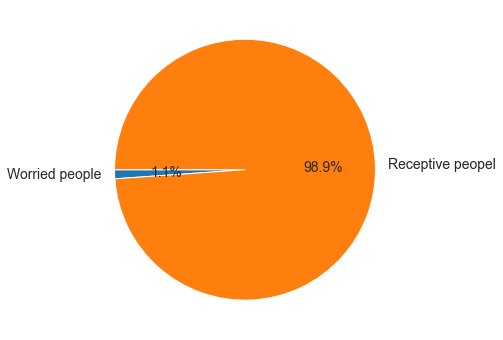

In [20]:
se_count=[df_se.shape[0],df_text.shape[0]]
se_label=['Worried people','Receptive peopel']
plt.figure(figsize=(12,6))
plt.pie(se_count, labels=se_label,autopct='%1.1f%%', startangle=180)
plt.title=("Percentage of worried people")

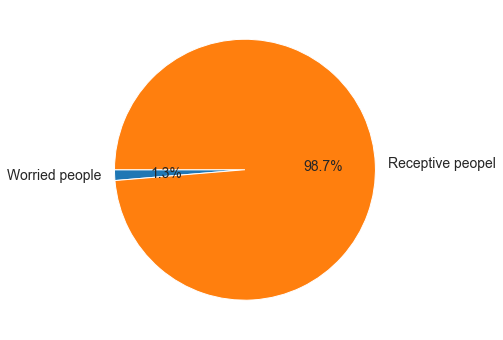

In [21]:
df_se_original=df_se[~df_se['text'].str.contains('RT')]
se_count1=[df_se_original.shape[0],df_original.shape[0]]
plt.figure(figsize=(12,6))
plt.pie(se_count1, labels=se_label,autopct='%1.1f%%', startangle=180)
plt.title=("Percentage of subjective worried people")

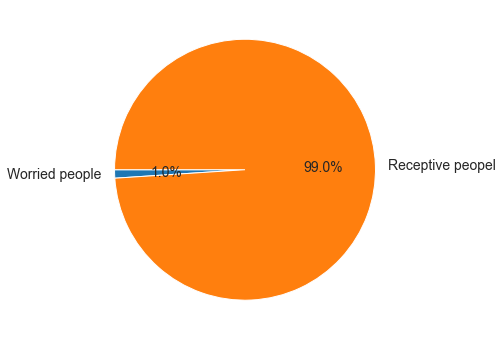

In [22]:
df_se_retweet=df_se[df_se['text'].str.contains('RT')]
se_count2=[df_se_retweet.shape[0],df_retweet.shape[0]]
plt.figure(figsize=(12,6))
plt.pie(se_count2, labels=se_label,autopct='%1.1f%%', startangle=180)
plt.title=("Percentage of passive worried people")

<font size=3>By comparing the tweets that mention side effects with those that are not mentioned, we can know that most people are optimistic about vaccines, and only a few people are worried. In general, we believe that people who send original tweets are more willing to express their opinions than people who repost them. Among those who edit original tweets, the proportion of those who expressed concerns was higher than those who reposted tweets.So we can also think that these people who express themselves are more worried about vaccines.</font>

<font size=5>Q2:Which country is more concerned about the covid-19 vaccine? </font>

<font size=3>By cleaning the data, the project summarizes the locations of users participating in this topic. Although the source of this data is user data, it does not indicate the user's current location. However, since there is less real-time location data for Twitter, and the possibility of moving between countries is less, location information is still meaningful. We hope to roughly judge the degree of attention by comparing the number of participants in two countries.</font>

In [23]:
df_final_location

,user_location,favorite_count,retweet_count
7,USA,0,4454
8,USA,0,30
9,USA,0,43
10,USA,0,39
17,USA,0,0
...,...,...,...
1128,USA,0,263
1129,USA,0,0
1132,USA,0,8
1140,USA,0,2


In [24]:
com_location=df_final_location.user_location.value_counts()
com_location

USA    165
UK     144
Name: user_location, dtype: int64

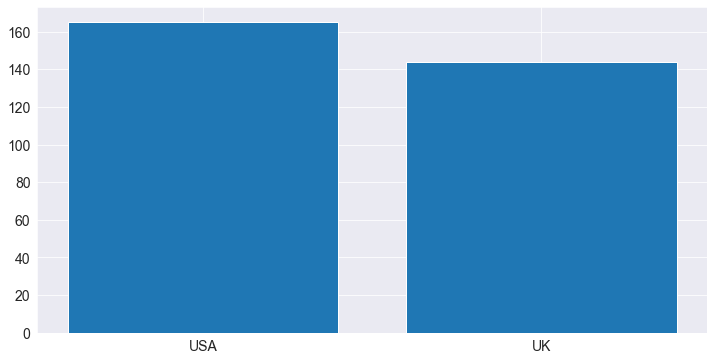

In [25]:
plt.figure(figsize=(12,6))
plt.bar(com_location.index,com_location)
plt.title=("Attention comparison")

<font size=3>By using the bar chart, we can find that the number of tweets sent by the two countries is basically similar. I'm not sure whether twitter will push more locally connected tweets based on our IP address. But if not, we can think that the British are more concerned about vaccines. Obviously, the number of Twitter users and even the total population of the two countries are quite different. In this case, the participation of Twitter users in the two countries is similar. We can explain this situation by saying that there are either more UK users participating in this topic, or the average number of tweets per UK user.<font>

In [26]:
com_sum=df_final_location.groupby(['user_location']).agg({'favorite_count':sum,'retweet_count':sum}) 

In [27]:
com_sum

,favorite_count,retweet_count
user_location,,
UK,10,182665
USA,21,181137


<font size=3>Through aggregation, I compare the count of retweet and favorite in two countries. It can be seen that Britain even surpasses the United States in retweet count. It can also confirm that British users are more concerned about vaccines, and the information about vaccines is more widely spread among British users. American users get more likes, which indicates that American users are more willing to express their opinions than to quote others' tweets. (few people like retweets in the data. Those who get likes are all original tweets)</font>

In [28]:
com_fav_mean=df_final_location.groupby(['user_location'])['favorite_count'].mean()

In [29]:
com_fav_mean

user_location
UK     0.069444
USA    0.127273
Name: favorite_count, dtype: float64

In [30]:
com_rt_mean=df_final_location.groupby(['user_location'])['retweet_count'].mean()

In [31]:
com_rt_mean

user_location
UK     1268.506944
USA    1097.800000
Name: retweet_count, dtype: float64

<font size=3>From the comparison of the two means, it can be concluded that the Twitter reposted by users in the UK has a greater influence and a wider range of overall dissemination. American users express themselves more about vaccines and are more willing to speak for themselves.</font>

<font size=5>Q3:What about the covid-19 vaccine can attract attention? </font>

In [32]:
top_retweet=df_retweet.sort_values(by=['favorite_count','retweet_count'])

In [33]:
top3_retweet = top_retweet.drop_duplicates(subset=['text'], keep='last')
top3_retweet.tail(3)

,user,text,favorite_count,retweet_count
219,ら,RT @Chunkz: just saw 4 homeless men giving eac...,0,11073
896,Michael Ferguson,"RT @smotus: Two presidencies today\n\nBiden: ""...",0,20078
1032,kartequette | #BlackLivesMatter,"RT @charliecherrim: “What else, what else... t...",0,23454


<font size=3>It's disappointing that the top three in retweet are all jokes. Although it involves covid-19 vaccine, it doesn't show its attitude towards vaccine. One of them, for example, is to use the vaccine to satirize Donald Trump's failure to fight the epidemic.<font>

In [34]:
top3_original=df_original.sort_values(by=['favorite_count','retweet_count'])

In [35]:
top3_original.tail(3)

,user,text,favorite_count,retweet_count
931,The Independent,Up to one fifth of staff in some care home gro...,8,4
865,leiaj,In the back of a gallery getting my covid vacc...,9,0
106,Michael Knowles,Well that's not good. https://t.co/HAQlNdhGcu,24,6


<font size=3>Among the original tweets, one is about the adverse situation caused by covid-19 vaccine, the other is about the media's report on the group who refused the vaccine, and the other is about the author's vaccination experience. Comparing with top three retweets,we can conclude that although most people do not reject the vaccine, they do not attach enough importance to it. Among those who actively expressed their views on vaccines, the side effects of vaccines and the vaccination process were the most discussed.Obviously these issues can attract people's attention. <font>

 <font size=6>3 Conclusion</font>

<font size=3>I learned the following three aspects of knowledge from task 3. The first is how to get data. At the scraping stage，I use API to get data. But there is also a big drawback, that is, the data open to the outside world by API is limited. So in the later study, I will try to use HTML to get data. At the same time, I also have a problem about obtaining influential twitters. I think I will to find the answer in later study.



Second, I learned how to clean data. Any accurate conclusion depends on effective data,so data cleaning is the most important premise of analysis. In the data cleaning stage, I am not limited to the basic operations such as modifying the date. I choose to select the data by filtering the values. This operation has greatly improved my analysis accuracy, and I will continue to use this method in the future data cleaning. I think I did a meaningful job in handling location. I used a function to integrate the confusing information into standard data. Although the information base I set up may not be comprehensive enough, resulting in the decline of accuracy. This part of the study really aroused my interest in text analysis.



In the last part, I learned how to analyze the data I got. I think if you want to analyze these data, you need to understand the meaning of a single data. For example, location indirectly indicates nationality, retweet count shows the influence of this tweet, and so on. And we need to find links in these data and analyze them according to the links. In this process, some prior conditions are required to help us reach the conclusion. For example, people who edit original tweets rather than retweets have a stronger desire to express themselves. These things are easy to understand in real life, but in data analysis, I think we need to give a more objective explanation.



So I think I have basically completed the task requirements, but I still have a lot to improve.</font>